# Implementations

In [106]:
# numpy is used to perform a wide variety of mathematical operations on arrays.
import numpy as np

# pandas is used for data analysis and associated manipulation of tabular data in Dataframes.
import pandas as pd

# Pyplot is a library consisting of a collection of functions/methods used for plotting simple 2D graphs using Python.
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library based on matplotlib.
import seaborn as sns

# Python program terminates immediately if an error occurs.
import warnings
warnings.filterwarnings("ignore")

# Learning algorithms benefit from standardization of the data set.
from sklearn import preprocessing

## Reading the dataset

In [107]:
# pandas.read_csv to read csv files.
df = pd.read_csv('customer_churn.csv')

## Data preparation

### Analysis about statistics of the dataset

In [108]:
# .info() function to discover the different data types the dataset contains and display all columns and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [109]:
# .shape attribute of the DataFrame to see its dimensionality. The result is a tuple containing the number of rows and columns.
df.shape

(7043, 21)

In [110]:
# setting the display as max to show all columns.
pd.set_option("display.max.columns", None)

In [111]:
# .head() function to show the titles of each column and 5 rows of the dataset.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
# .describe() function to show some basic descriptive statistics for all numeric columns (numeric columns only).
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Checking for null values in the dataset

In [113]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###### No null values

### Checking for duplicated values in the dataset

In [114]:
df.duplicated().sum()

0

###### No duplicate values

## Feature Engineering

##### Since that dataset has non-numerical values we apply feature engineering methods for them.

In [115]:
data_col = df.columns
data_col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [116]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [117]:
le = preprocessing.LabelEncoder()
for i in data_col:
    df[i]=le.fit_transform(df[i])

In [118]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


#### Dropping the customerID column as it doesn't provide any value to our analytics.

In [119]:
df = df.drop(['customerID'], axis = 1)

In [120]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


## Data visualization

### Checking the dataset balance

In [121]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

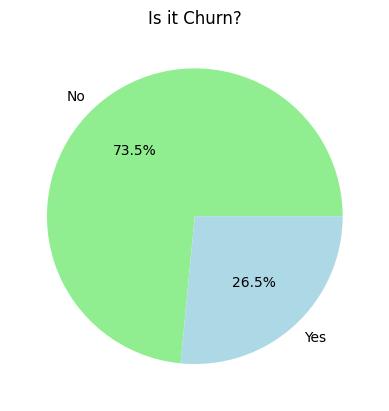

In [122]:
label = ["No", "Yes"]
value = df['Churn'].value_counts().values
color = ['lightgreen', 'lightblue']
fig, ax = plt.subplots()
ax.pie(value, labels = label, colors = color, autopct = '%1.1f%%')
ax.set_title('Is it Churn?')
plt.show()

##### As shown, the data is not blanced in term of Churn.

### Divide the variables into categorical and continuous data for visualization

In [123]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

continuous = ['tenure', 'MonthlyCharges', 'TotalCharges']

#### Analysing the categorical variables

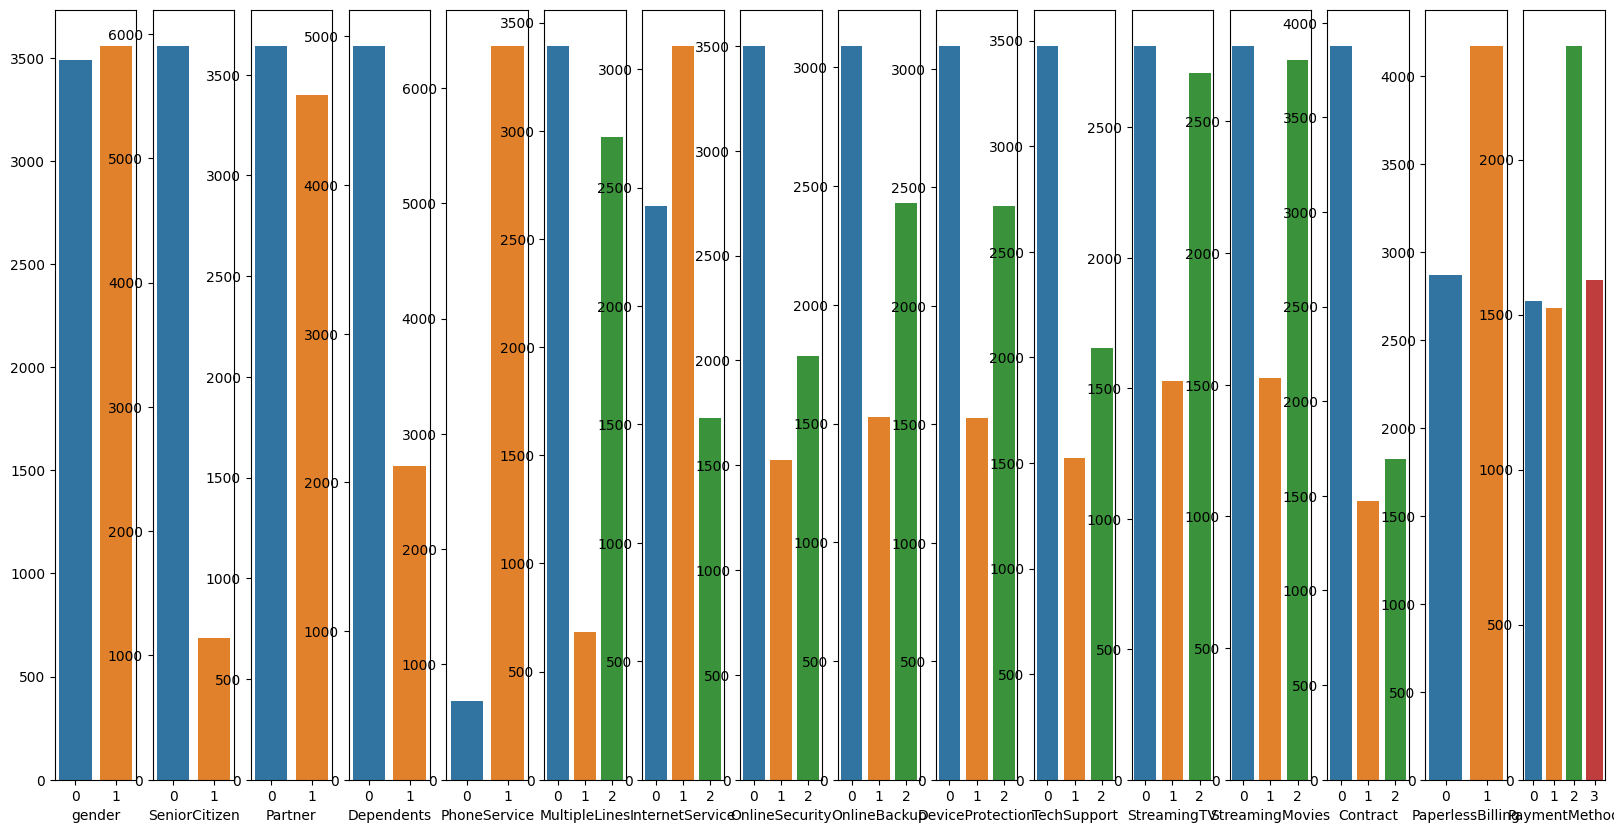

In [124]:
fig, axs = plt.subplots(1, len(categorical), figsize = (20, 10))

for i in range(len(categorical)):
    sns.countplot(x = df[categorical[i]], ax = axs[i])
    axs[i].set_ylabel('')

###### Containing imbalanced data

#### Analysis the continous variables

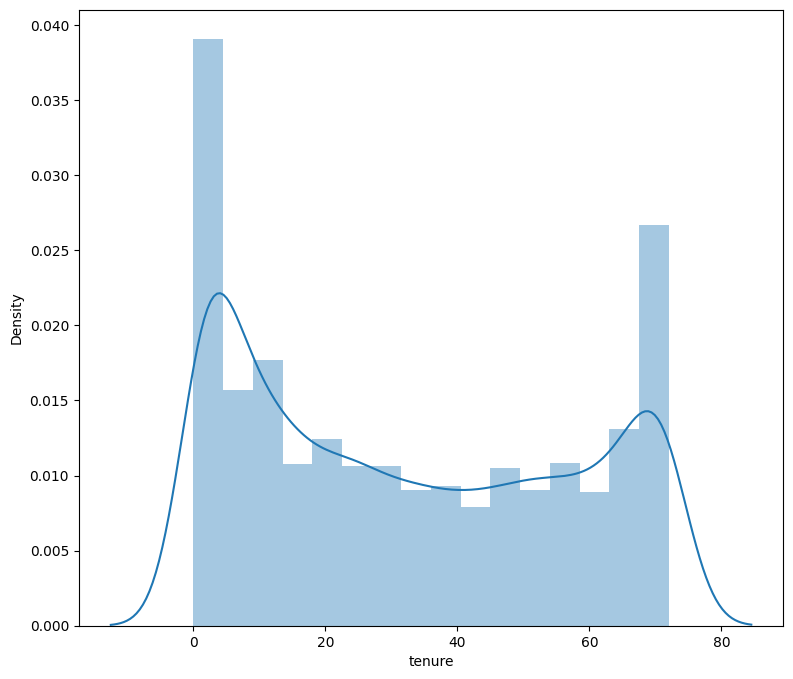

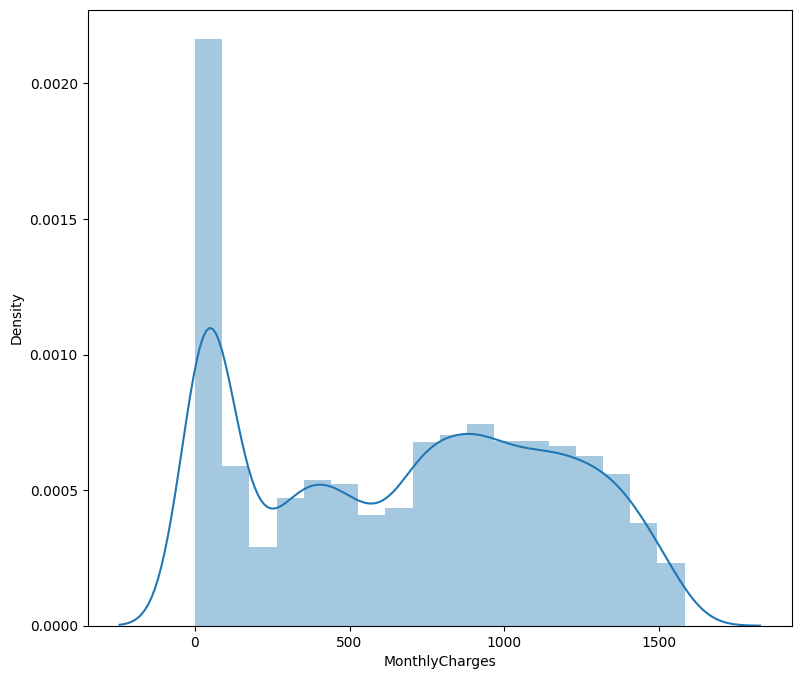

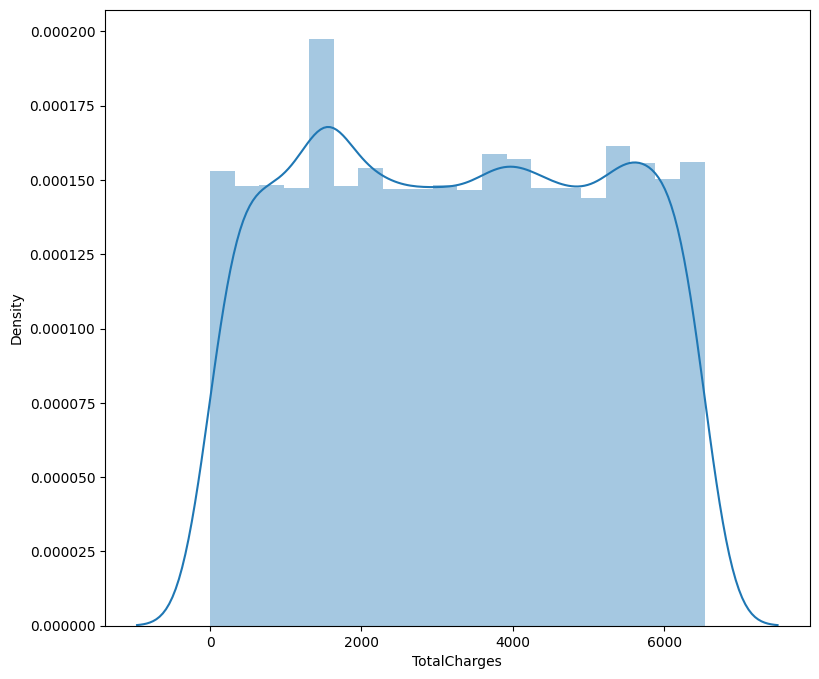

In [125]:
for var in continuous:
    plt.figure(figsize = (20,8))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('Density')
    fig.set_xlabel(var)

### Checking for outliers

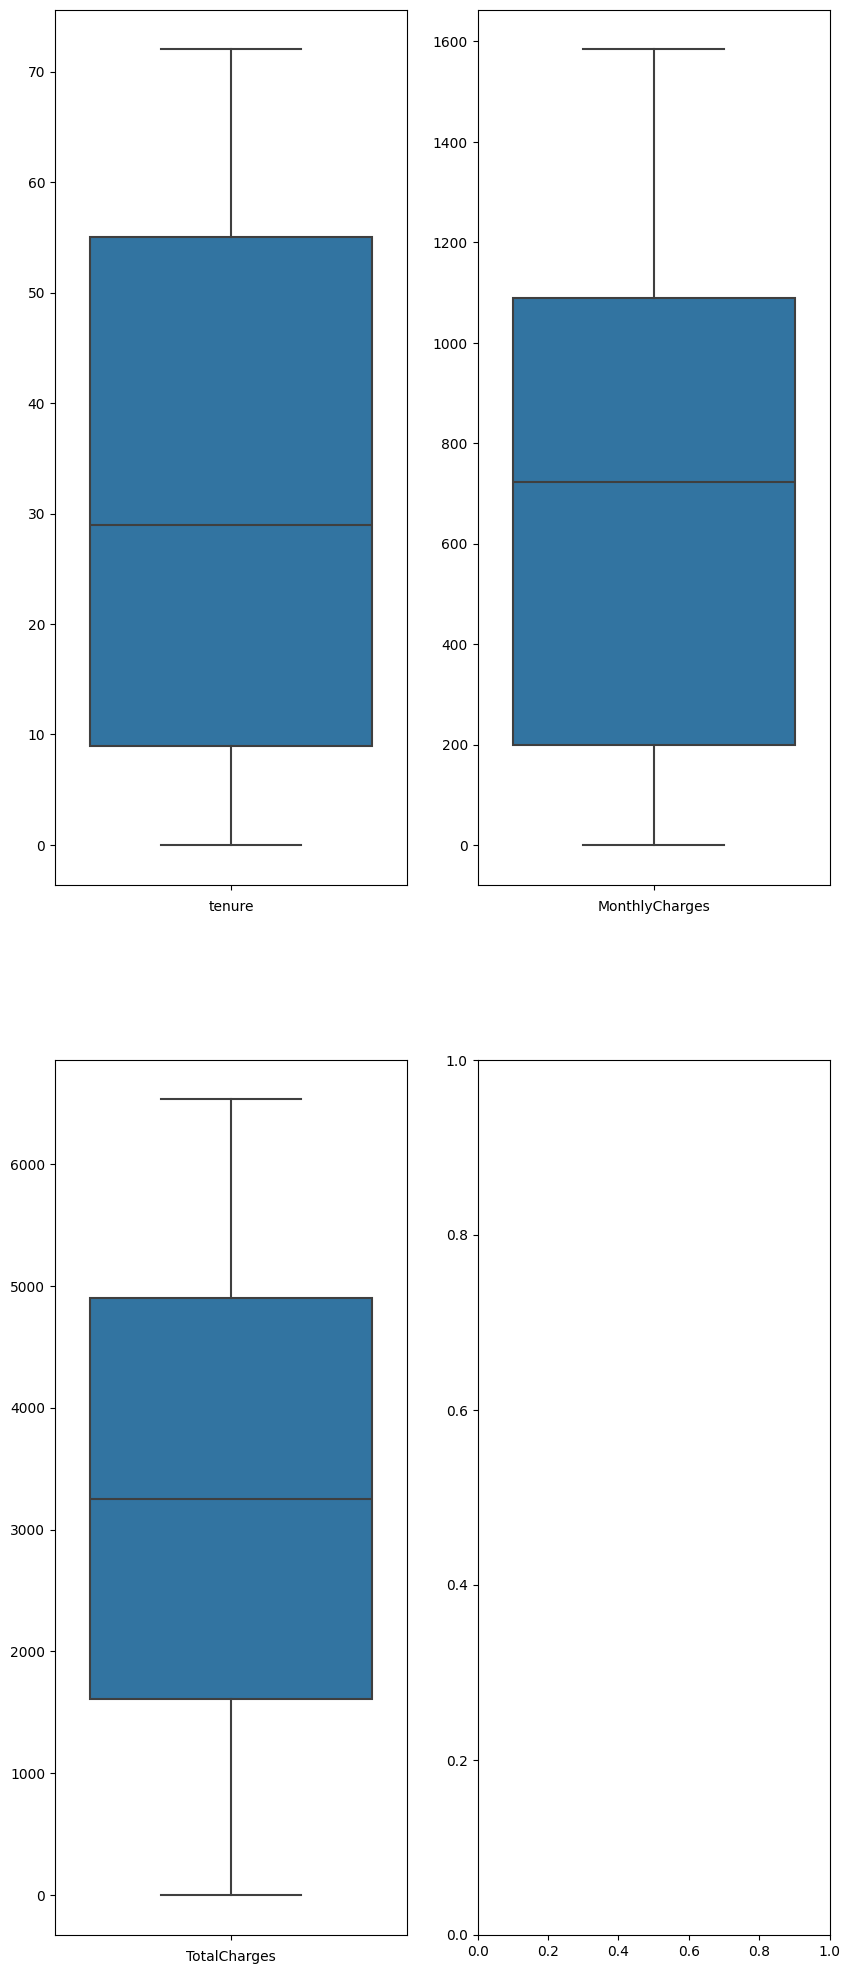

In [126]:
fig, axs = plt.subplots(2, 2, figsize = (10, 25))

for i in range(len(continuous)):
    sns.boxplot(y = df[continuous[i]], ax = axs[i//2][i%2])
    axs[i//2][i%2].set_xlabel(continuous[i])
    axs[i//2][i%2].set_ylabel('')
    
plt.show()

###### There are no outlier(s) in the data.

### Correlation

#### Correlation is a statistical term describing the degree to which two variables move in coordination with one another

#### Using heatmap

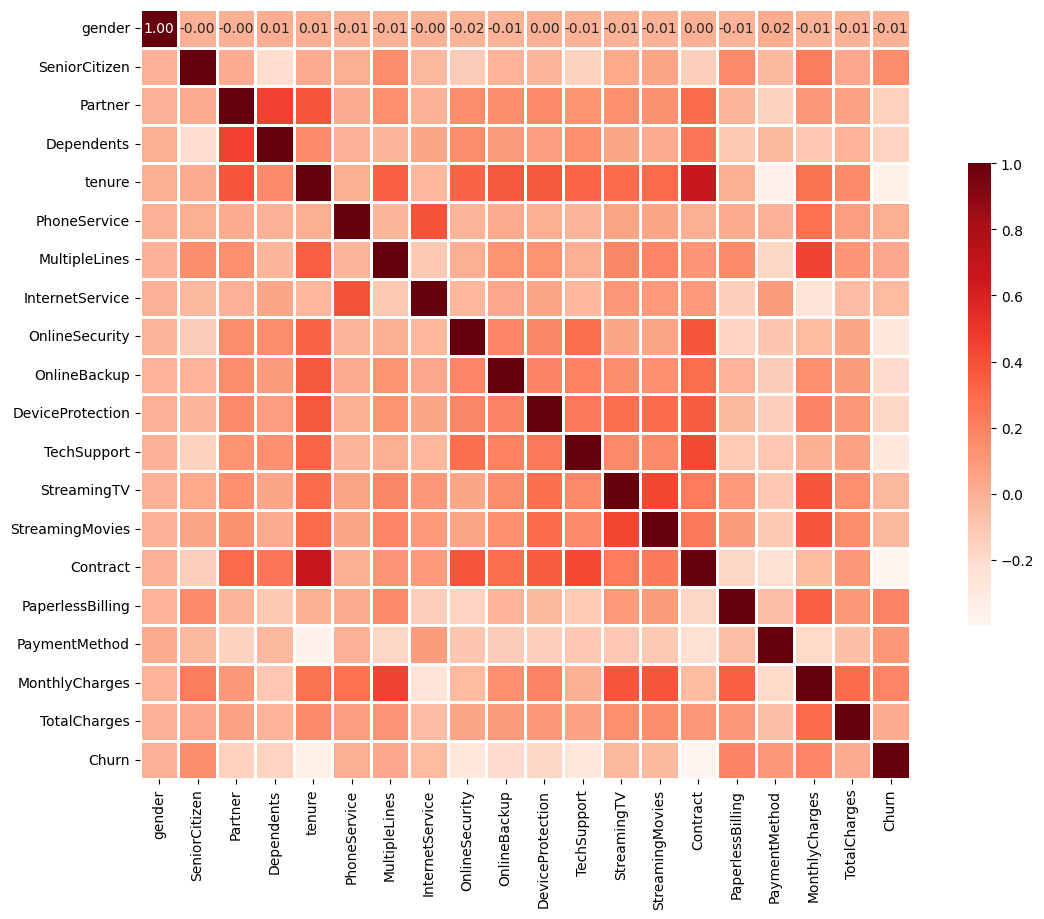

In [127]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = plt.cm.Reds, cbar_kws = {'shrink': .6}, square = True, annot = True, fmt = '.2f', linewidths = .8)
plt.show()

### The aim is to predict the Churn using Classification technique. Since our aim which is Churn output variable is a category, the best technique for it is Classification.

### Feature selection by dropping the price range column for classification prediction

In [128]:
X = df.drop(columns = 'Churn')
y = df['Churn']

### Data splitting

#### 80% Train, %20 Test

In [129]:
# A function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(5634, 19)
(1409, 19)


### Data transformation

In [130]:
# StandardScaler is used to resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Logistic Regression Model

#### Logistic regression is a process of modeling the probability of a discrete outcome given an input variable.

##### Default hyperparameters

In [131]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### Prediction

In [132]:
y_train_pred = log_reg.predict(X_train)
print(f"Train accuracy is: {(y_train_pred == y_train).mean()*100}%")

y_test_pred = log_reg.predict(X_test)
print(f"Test accuracy is: {(y_test_pred == y_test).mean()*100}%")

Train accuracy is: 80.47568335108272%
Test accuracy is: 80.69552874378992%


### Evaluation metrics

In [133]:
# train dataset
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4113
           1       0.67      0.54      0.60      1521

    accuracy                           0.80      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.80      0.80      5634



In [134]:
# test dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1061
           1       0.62      0.58      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



### confusion matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

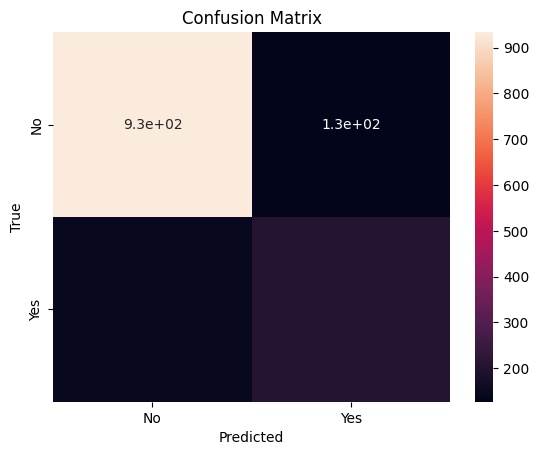

In [135]:
from sklearn.metrics import confusion_matrix
label = ["No", "Yes"]

cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

### Hyperparameter Tuning

##### Hyperparameter Tuning is the process of determining the right combination of hyperparameters that maximizes the model performance. It works by running multiple trials in a single training process.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [136]:
# GridSearchCV is a library function that helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()
log_parameters = {"solver": ['newton-cg', 'lbfg', 'liblinear'], "penalty": ['l1', 'l2'], "C":[100, 10, 1.0, 0.1, 0.001]}

# cv Determines the cross-validation splitting strategy.
# Scorer function used on the held out data to choose the best parameters for the model.
log_reg = GridSearchCV(log_reg, log_parameters, cv = 5, scoring = 'accuracy')
log_reg.fit(X_train, y_train_pred)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.001],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfg', 'liblinear']},
             scoring='accuracy')

#### Checking best parameters

In [137]:
log_reg.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

#### Modifying the model with the best parameters

In [138]:
log_reg = LogisticRegression(C = 100, penalty = 'l1', solver = 'liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

#### Prediction

In [139]:
y_train_pred = log_reg.predict(X_train)
print(f"Train accuracy is: {(y_train_pred == y_train).mean()*100}%")

y_test_pred = log_reg.predict(X_test)
print(f"Test accuracy is: {(y_test_pred == y_test).mean()*100}%")

Train accuracy is: 80.47568335108272%
Test accuracy is: 80.69552874378992%


#### Evaluation metrics

In [140]:
# train dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4113
           1       0.67      0.54      0.60      1521

    accuracy                           0.80      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.80      0.80      5634



In [141]:
# test dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1061
           1       0.62      0.58      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



#### Confusion Matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

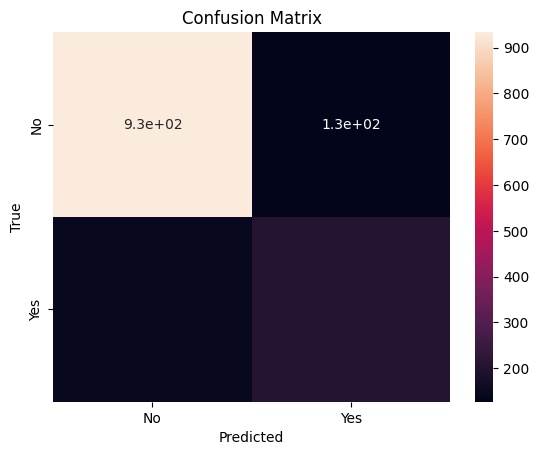

In [142]:
label = ["No", "Yes"]

cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

## Decision Tree Model

#### Decision tree builds classification or regression models in the form of a tree structure

##### Default hyperparameters

In [143]:
from sklearn.tree import DecisionTreeClassifier

# criterion : This parameter determines how the impurity of a split will be measured. The default value is “gini”
dec_tree = DecisionTreeClassifier(criterion = 'gini')
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction

In [144]:
y_train_pred = dec_tree.predict(X_train)
print(f"Train accuracy is: {(y_train_pred == y_train).mean()*100}%")

y_test_pred = dec_tree.predict(X_test)
print(f"Test accuracy is: {(y_test_pred == y_test).mean()*100}%")

Train accuracy is: 99.80475683351084%
Test accuracy is: 72.81760113555713%


### Evaluation metrics

In [145]:
# train dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4113
           1       1.00      0.99      1.00      1521

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [146]:
# test dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1061
           1       0.46      0.53      0.49       348

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.73      0.73      1409



### confusion matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

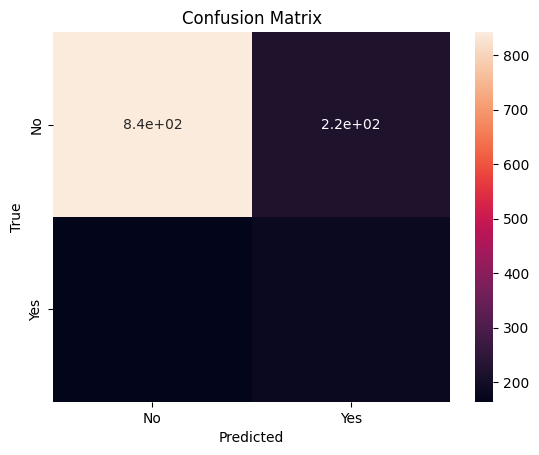

In [147]:
label = ["No", "Yes"]

cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

### Hyperparameter Tuning

In [148]:
dec_tree = DecisionTreeClassifier(criterion = 'gini')
dec_parameters = {"max_depth": [3, 5, 7, 9, 11, 13], "max_leaf_nodes": [19, 21, 23, 25]}
dec_tree = GridSearchCV(dec_tree, dec_parameters, cv = 5, scoring = 'accuracy')
dec_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [19, 21, 23, 25]},
             scoring='accuracy')

#### Checking best parameters

In [149]:
dec_tree.best_params_

{'max_depth': 5, 'max_leaf_nodes': 19}

#### Modifying the model with the best parameters

In [150]:
dec_tree = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 19, max_depth = 5)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=19)

#### Prediction

In [151]:
y_train_pred = dec_tree.predict(X_train)
print(f"Train accuracy is: {(y_train_pred == y_train).mean()*100}%")

y_test_pred = dec_tree.predict(X_test)
print(f"Test accuracy is: {(y_test_pred == y_test).mean()*100}%")

Train accuracy is: 79.92545260915868%
Test accuracy is: 80.55358410220013%


#### Evaluation metrics

In [152]:
# train dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4113
           1       0.67      0.50      0.58      1521

    accuracy                           0.80      5634
   macro avg       0.75      0.71      0.72      5634
weighted avg       0.79      0.80      0.79      5634



In [153]:
# test dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1061
           1       0.63      0.52      0.57       348

    accuracy                           0.81      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.81      0.80      1409



#### Confusion Matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

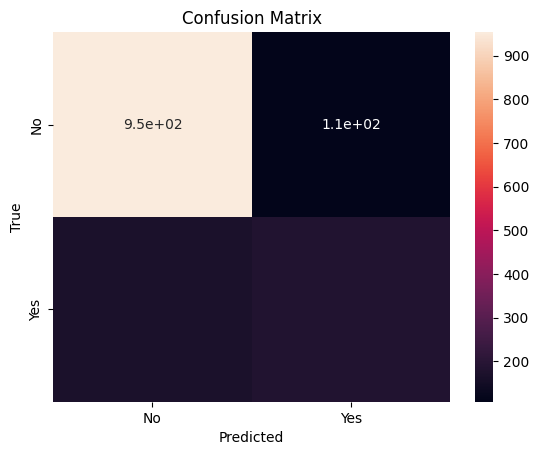

In [154]:
label = ["No", "Yes"]

cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

### Decision Tree Visualization

In [155]:
# tree is used to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
from sklearn import tree

'''
For graphviz library:
In Anaconda install:

python-graphviz
'''
# graphviz is used to create graph objects which can be completed using different nodes and edges.
from graphviz import Source

from sklearn.tree import export_graphviz

# IPython.display Support for interactive data visualization and use of GUI toolkits.
from IPython.display import display
from IPython.display import SVG


graph = Source(tree.export_graphviz(dec_tree, out_file = None,
                                    feature_names = X.columns, 
                                    class_names = ['0', '1'], filled = True))
display(SVG(graph.pipe(format = 'svg')))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## k-Nearest Neighbors Model

#### k-Nearest Neighbors is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

##### Default hyperparameters

In [156]:
from sklearn.neighbors import KNeighborsClassifier
k_nn = KNeighborsClassifier()
k_nn.fit(X_train,y_train)

KNeighborsClassifier()

### Prediction

In [157]:
y_train_pred = k_nn.predict(X_train)
print(f"Train accuracy is: {(y_train_pred == y_train).mean()*100}%")

y_test_pred = k_nn.predict(X_test)
print(f"Test accuracy is: {(y_test_pred == y_test).mean()*100}%")

Train accuracy is: 83.20908768193114%
Test accuracy is: 76.65010645848119%


### Evaluation metrics

In [158]:
# train dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4113
           1       0.71      0.64      0.67      1521

    accuracy                           0.83      5634
   macro avg       0.79      0.77      0.78      5634
weighted avg       0.83      0.83      0.83      5634



In [159]:
# test dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1061
           1       0.53      0.51      0.52       348

    accuracy                           0.77      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.76      0.77      0.77      1409



### Confusion Matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

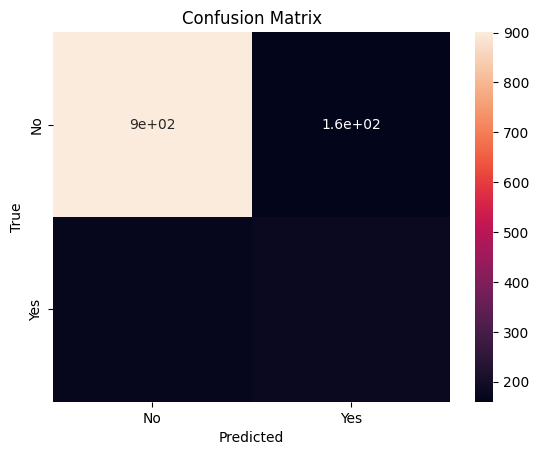

In [160]:
label = ["No", "Yes"]

cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

### Hyperparameter Tuning

In [161]:
k_nn = KNeighborsClassifier()
knn_parameters = {'n_neighbors':np.arange(1, 100)}

k_nn = GridSearchCV(k_nn, knn_parameters, cv = 5)
k_nn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

#### Checking best parameters

In [162]:
k_nn.best_params_

{'n_neighbors': 36}

#### Modifying the model with the best parameters

In [163]:
k_nn = KNeighborsClassifier(n_neighbors = 36)  
k_nn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=36)

#### Prediction

In [164]:
y_train_pred = k_nn.predict(X_train)
print(f"Train accuracy is: {(y_train_pred == y_train).mean()*100}%")

y_test_pred = k_nn.predict(X_test)
print(f"Test accuracy is: {(y_test_pred == y_test).mean()*100}%")

Train accuracy is: 79.42847000354988%
Test accuracy is: 80.69552874378992%


#### Evaluation metrics

In [165]:
# train dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4113
           1       0.65      0.52      0.58      1521

    accuracy                           0.79      5634
   macro avg       0.74      0.71      0.72      5634
weighted avg       0.78      0.79      0.79      5634



In [166]:
# test dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.62      0.57      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.81      0.80      1409



#### Confusion Matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

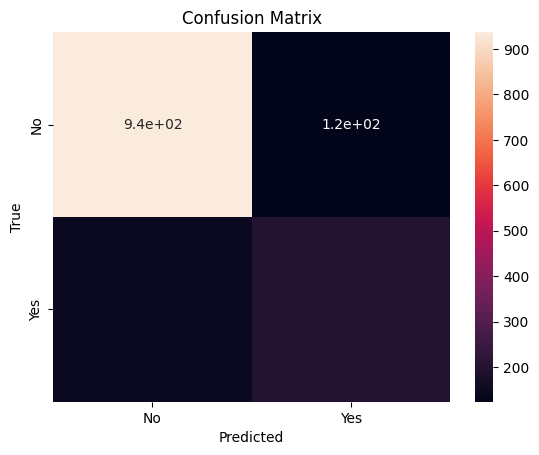

In [167]:
label = ["No", "Yes"]

cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)